In [52]:
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [69]:
canonical_parameters = tf.constant(
    [25.276] * 16 + [16] * 12,
    dtype="float32"
)
pi = tf.constant(math.pi)

In [74]:
def calculate_center_of_mass(parameters, show_plots=False):
    vertical_bar = tf.constant(
        [
            [0] * 6,
            [i*0.107/5 for i in range(6)],
        ],
        dtype="float32",
    )
    horizontal_bar = tf.constant(
        [
            [0.107*tf.cos(tf.constant(pi/2 + (pi/parameters[i + 16])*i)).numpy() for i in range(6)] + [0.107*tf.cos(tf.constant(pi/2 - (pi/parameters[i + 22])*i)).numpy() for i in range(6)],
            [0.107*tf.sin(tf.constant(pi/2 + (pi/parameters[i + 16])*i)).numpy() for i in range(6)] + [0.107*tf.sin(tf.constant(pi/2 - (pi/parameters[i + 22])*i)).numpy() for i in range(6)],
        ],
        dtype="float32"
    )
    v_centers = (vertical_bar[:, 1:] + vertical_bar[:, :-1])/2
    v_masses = tf.sqrt(tf.reduce_sum((vertical_bar[:, 1:] - vertical_bar[:, :-1])**2, axis=0)) * parameters[:5]
    
    h_centers = (horizontal_bar[:, 1:] + horizontal_bar[:, :-1])/2
    h_centers = tf.concat([h_centers[:, :5], h_centers[:, 6:]], axis=1)
    
    h_masses = tf.sqrt(tf.reduce_sum((horizontal_bar[:, 1:] - horizontal_bar[:, :-1])**2, axis=0)) * parameters[5:16]
    h_masses = tf.concat([h_masses[:5], h_masses[6:]], axis=0)
    
    total_mass = tf.reduce_sum(tf.concat([v_masses, h_masses], axis=0))
    center_of_mass = tf.reshape(tf.reduce_sum(tf.concat([v_centers * v_masses, h_centers * h_masses], axis=1), axis=1)/total_mass, shape=(2, 1))
    
    if show_plots:
        plt.figure(figsize=(11, 8))
        plt.plot(vertical_bar[0], vertical_bar[1], "o")
        plt.plot(horizontal_bar[0], horizontal_bar[1], "^")
        plt.plot(center_of_mass[0], center_of_mass[1], "s")
        plt.plot(h_centers[0], h_centers[1], "2")
        plt.plot(v_centers[0], v_centers[1], "3")
        
    return center_of_mass, total_mass

(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[-4.6529244e-10],
        [ 7.7888846e-02]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.006342>)

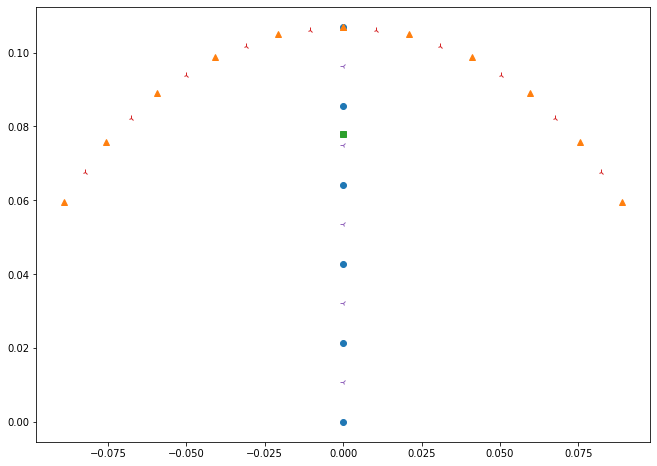

In [75]:
calculate_center_of_mass(canonical_parameters, show_plots=True)

In [78]:
# possible_densities = tf.random.uniform((1000, 16), minval=5, maxval=50, dtype="float32", seed=42)
# parameters = tf.random.uniform((1000, 12), minval=16, maxval=24, dtype="float32", seed=42)

In [79]:
# parameters = tf.concat([possible_densities, parameters], axis=1)# 

In [80]:
# good_params = []
# for index, density in enumerate(parameters):
    # _, mass = calculate_center_of_mass(density)
    # if 4 <= mass <= 8:
        # good_params.append(density)

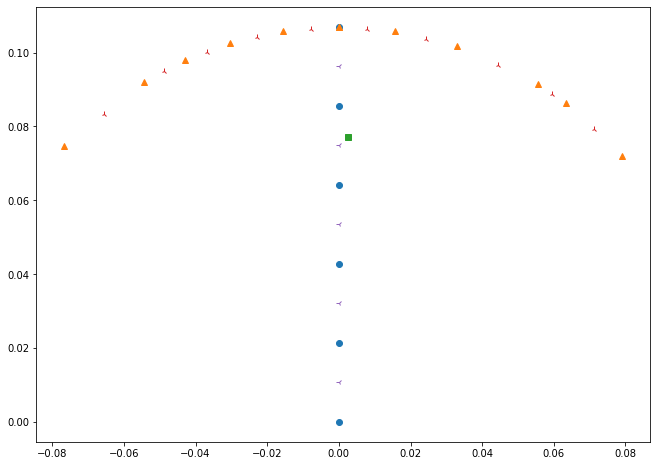

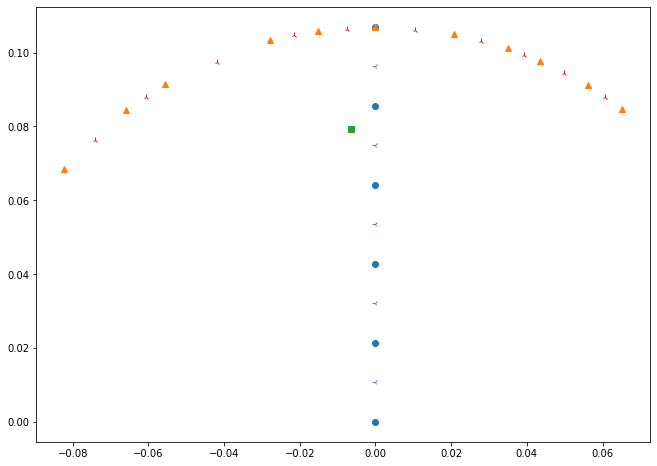

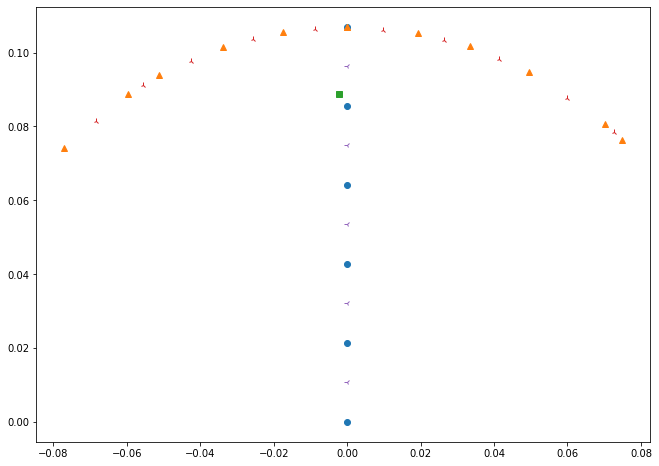

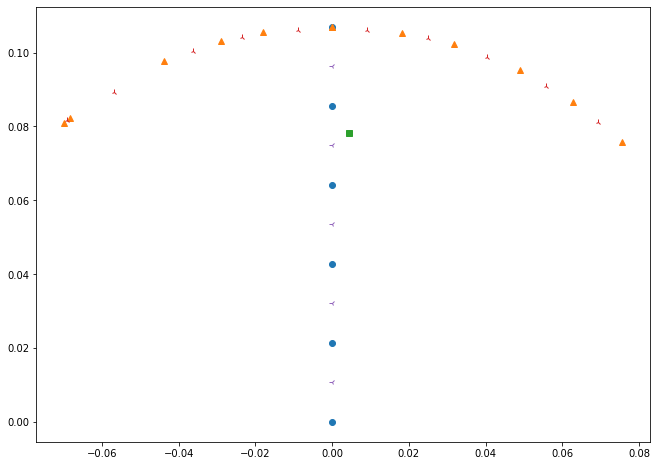

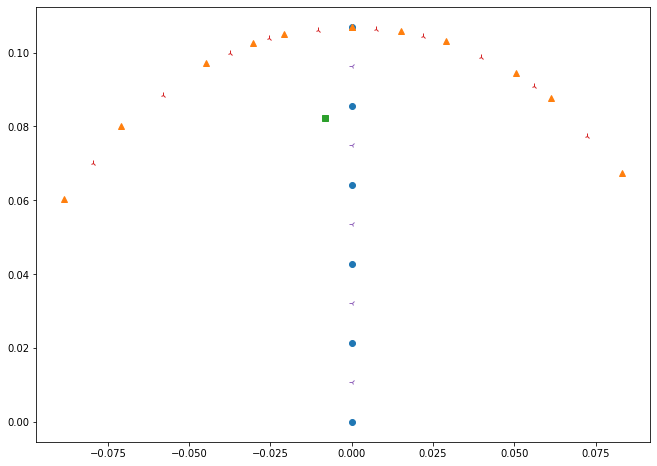

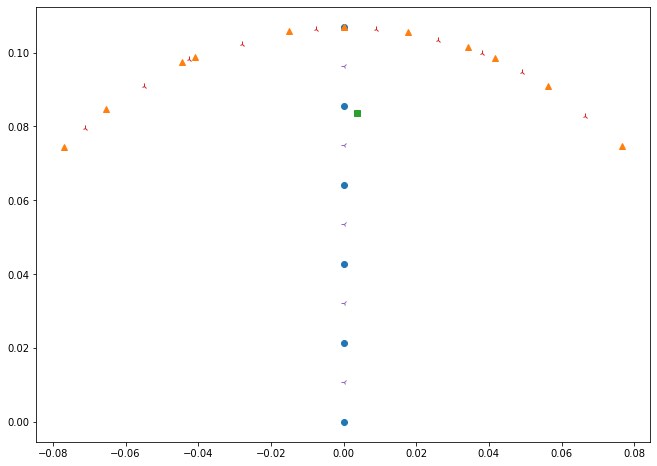

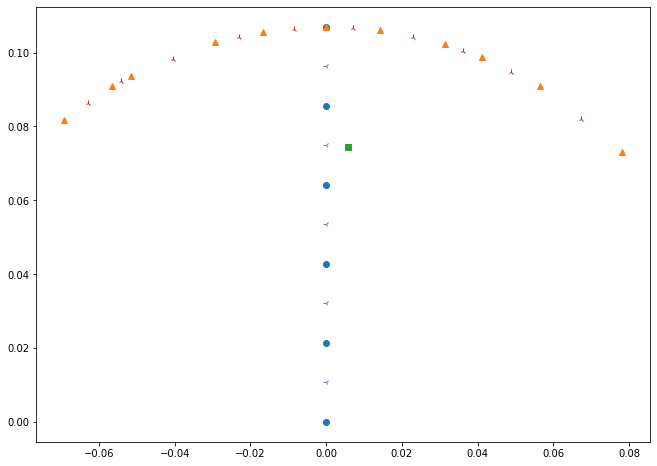

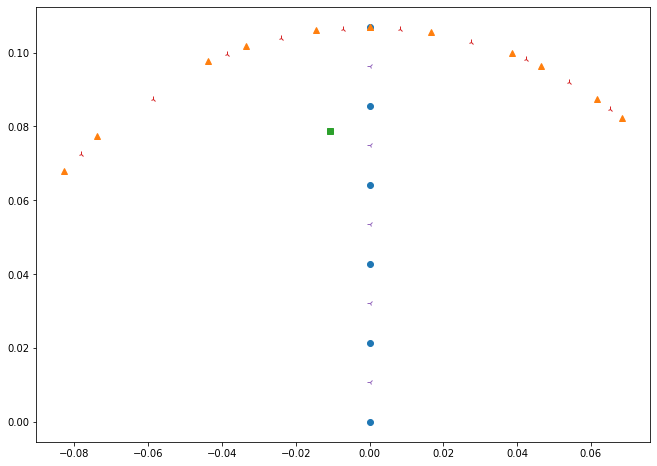

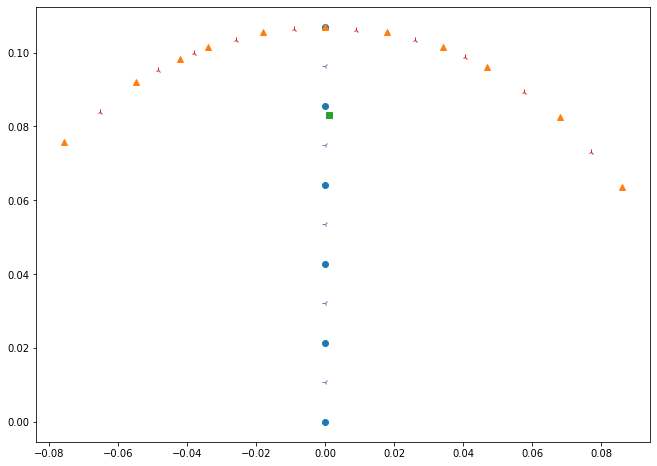

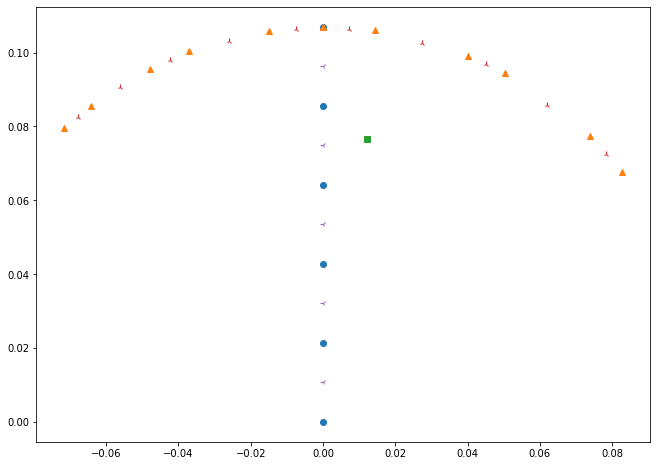

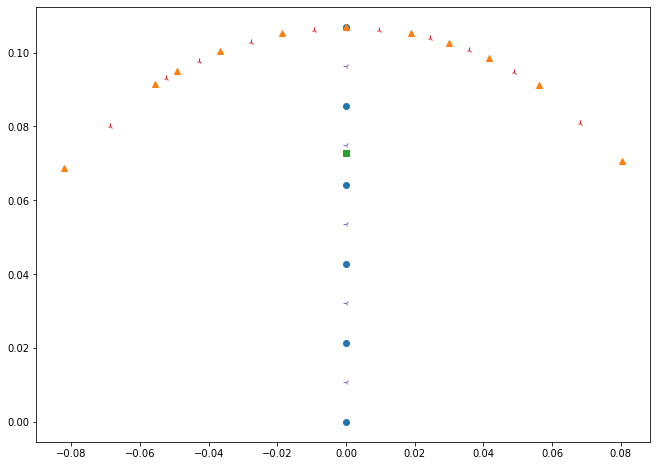

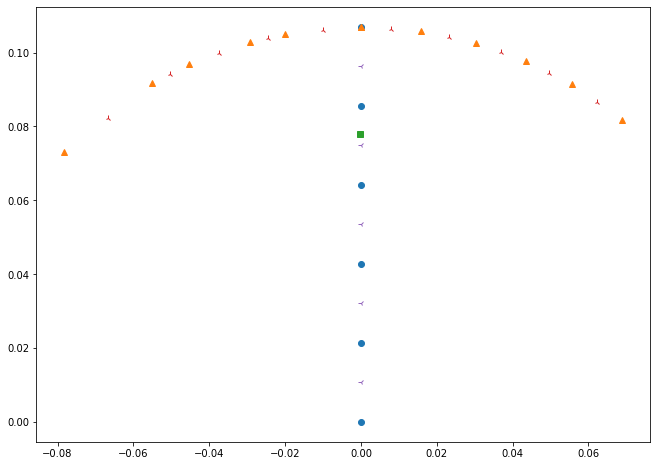

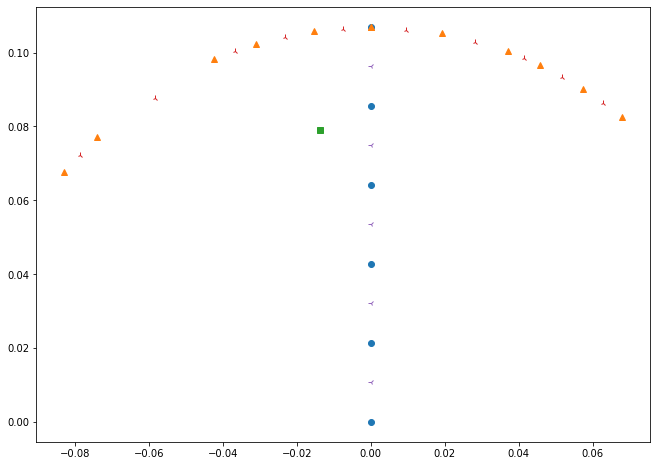

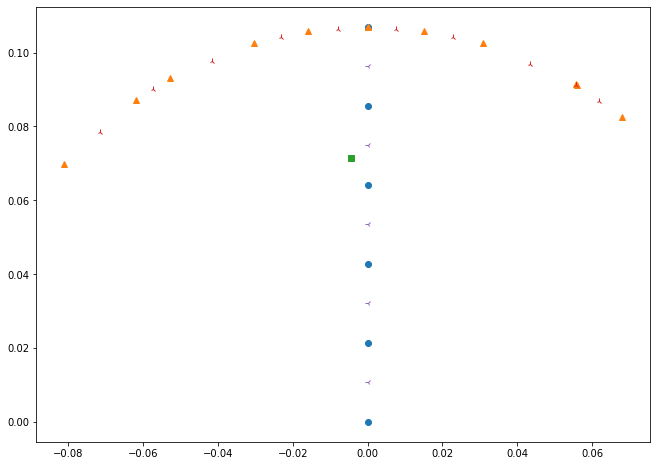

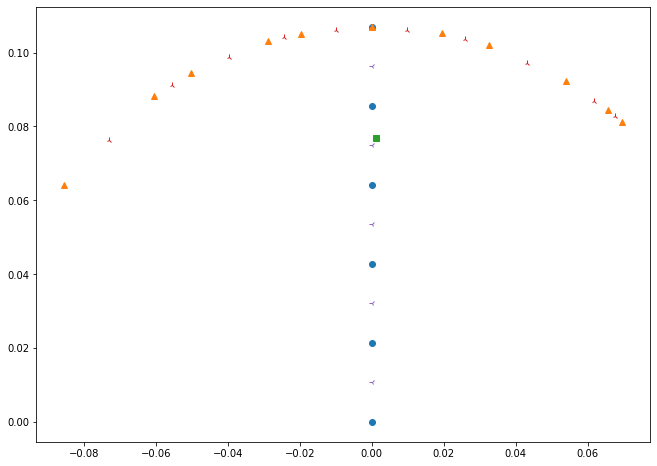

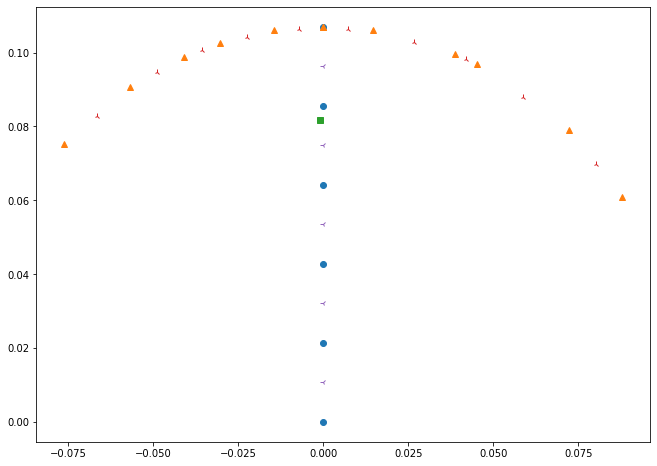

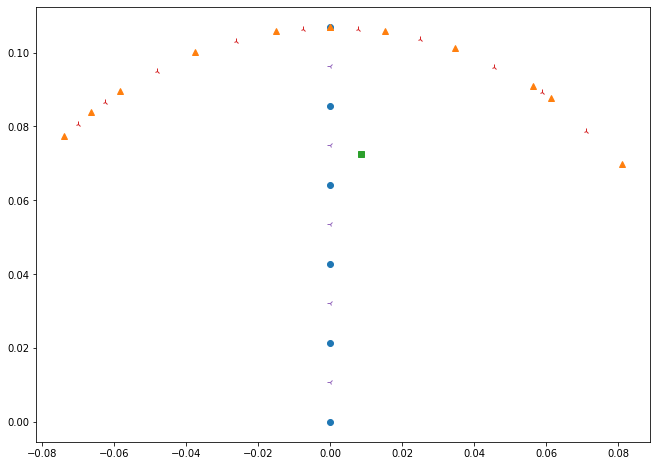

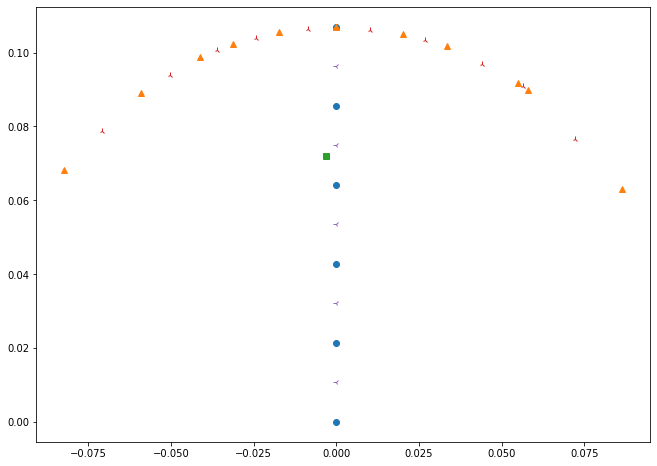

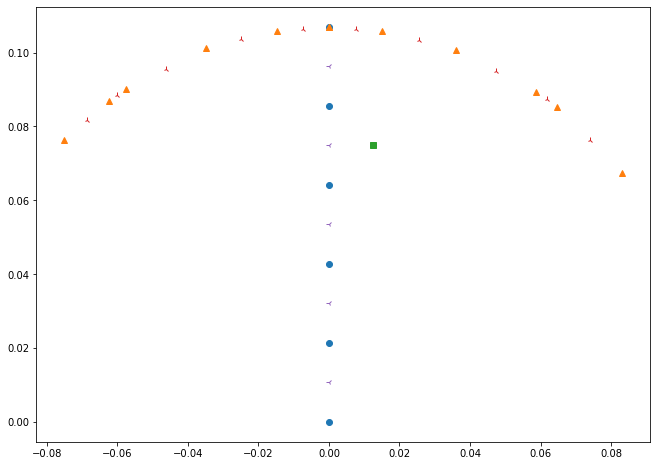

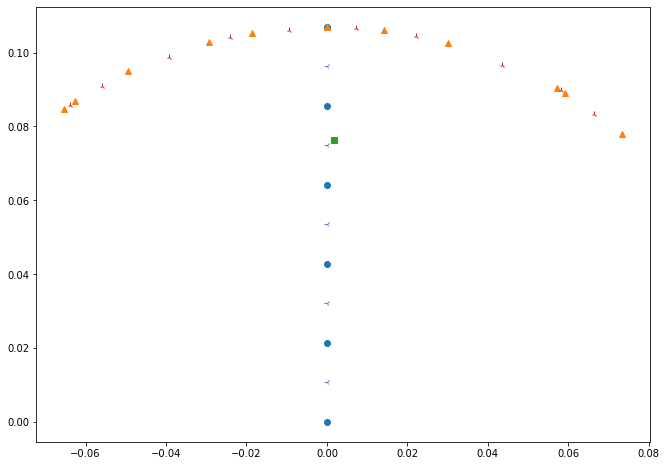

In [81]:
# for i in range(20, 40):
    # calculate_center_of_mass(good_params[i], show_plots=True)